In [1]:
# basic modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#settings
warnings.filterwarnings('ignore')
rs = 42

In [2]:
df = pd.read_csv('data/mimic_clean.csv')

# Overview

In [3]:
df.columns

Index(['label', 'hadm_id', 'icustay_id', 'gender', 'age', 'numb_diagn',
       'last_careunit', 'los', 'tracheo', 'PaO2', 'base_excess', 'creatinin',
       'hb', 'hct', 'pH', 'FiO2', 'PEEP', 'SaO2', 'blood_pr', 'hr',
       'lactic_acid', 'leuko', 'mean_insp_pr', 'resp_rat', 'tidal_vol',
       'breath_min_vol'],
      dtype='object')

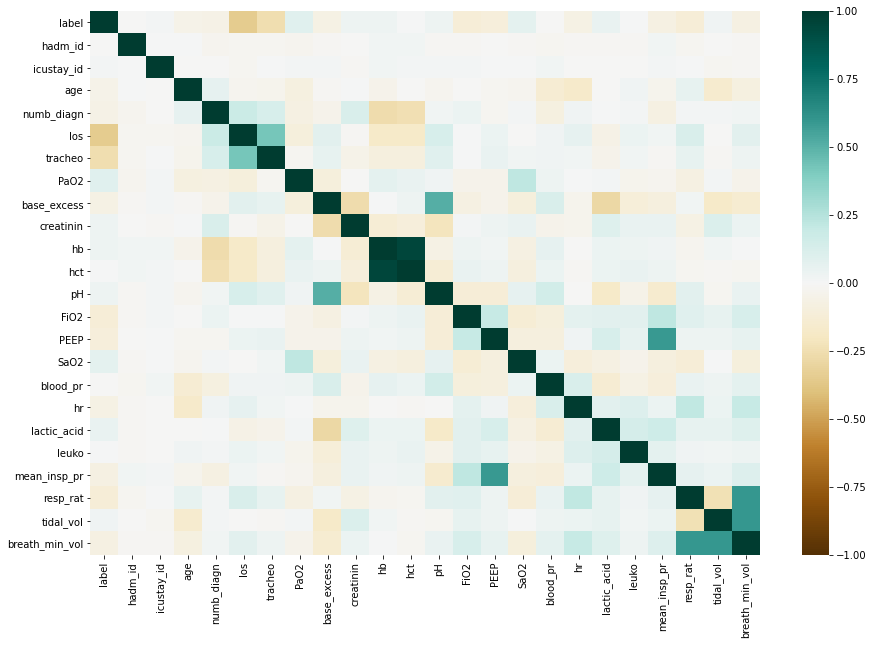

In [4]:
plt.figure(figsize=(15,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,cmap="BrBG",annot=False, vmin=-1, vmax=1);

Because hemoglobin und hematocrit are strongly correlated statistically as well as biologically, we decide to drop one. In our case hematocrit. 

In [4]:
df.drop('hct', axis=1, inplace=True)

In [5]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

In [6]:
so[so < 1].head(15)

tidal_vol       breath_min_vol    0.597442
breath_min_vol  tidal_vol         0.597442
                resp_rat          0.596016
resp_rat        breath_min_vol    0.596016
mean_insp_pr    PEEP              0.592371
PEEP            mean_insp_pr      0.592371
base_excess     pH                0.514932
pH              base_excess       0.514932
tracheo         los               0.425677
los             tracheo           0.425677
label           los               0.346464
los             label             0.346464
base_excess     lactic_acid       0.282186
lactic_acid     base_excess       0.282186
base_excess     creatinin         0.263671
dtype: float64

In [8]:
#sns.pairplot(df)

# Check Datatypes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5884 entries, 0 to 5883
Data columns (total 25 columns):
label             5884 non-null int64
hadm_id           5884 non-null int64
icustay_id        5884 non-null int64
gender            5884 non-null object
age               5884 non-null float64
numb_diagn        5884 non-null int64
last_careunit     5884 non-null object
los               5884 non-null float64
tracheo           5884 non-null int64
PaO2              5884 non-null float64
base_excess       5884 non-null float64
creatinin         5884 non-null float64
hb                5884 non-null float64
pH                5884 non-null float64
FiO2              5884 non-null float64
PEEP              5884 non-null float64
SaO2              5884 non-null float64
blood_pr          5884 non-null float64
hr                5884 non-null float64
lactic_acid       5884 non-null float64
leuko             5884 non-null float64
mean_insp_pr      5884 non-null float64
resp_rat          5884 no

Change 'gender' to 'ismale': 1= True, 0= False

In [9]:
df['ismale'] = df.gender.apply(lambda x: 1 if x == 'M' else 0)

In [10]:
df.ismale.unique()

array([1, 0])

In [11]:
df.drop('gender', axis=1, inplace=True)

In [12]:
#Feature_new = pd.get_dummies(df['Feature'], prefix=" ", drop_first=True)
Feature_new = pd.get_dummies(df.last_careunit, prefix="icu", drop_first=True)
df = pd.concat([df, Feature_new],axis=1)

In [13]:
df.drop('last_careunit', axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Data columns (total 26 columns):
label             5836 non-null int64
age               5836 non-null float64
numb_diagn        5836 non-null int64
los               5836 non-null float64
tracheo           5836 non-null int64
PaO2              5836 non-null float64
base_excess       5836 non-null float64
creatinin         5836 non-null float64
hb                5836 non-null float64
pH                5836 non-null float64
FiO2              5836 non-null float64
PEEP              5836 non-null float64
SaO2              5836 non-null float64
blood_pr          5836 non-null float64
hr                5836 non-null float64
lactic_acid       5836 non-null float64
leuko             5836 non-null float64
mean_insp_pr      5836 non-null float64
resp_rat          5836 non-null float64
tidal_vol         5836 non-null float64
breath_min_vol    5836 non-null float64
ismale            5836 non-null int64
icu_CSRU          583

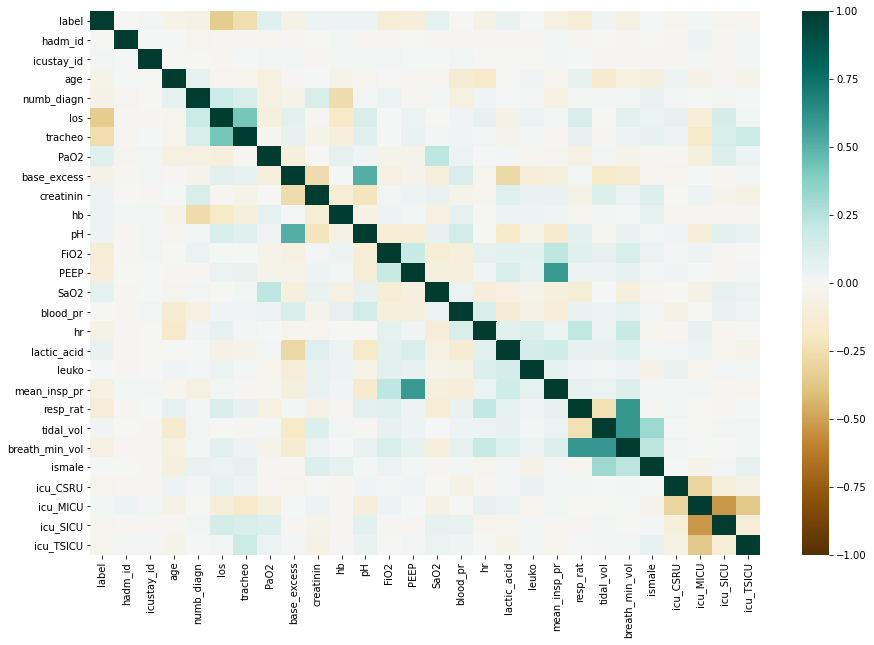

In [14]:
plt.figure(figsize=(15,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,cmap="BrBG",annot=False, vmin=-1, vmax=1);

In [15]:
df.to_csv('data/mimic_premodel.csv', index=False)